In [91]:
import pandas as pd
import numpy as np
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import requests
import json
from datetime import datetime
%matplotlib inline
from MCForecastTools import MCSimulation
from pycoingecko import CoinGeckoAPI

In [26]:
cg = CoinGeckoAPI()

In [27]:
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 37658}}

In [28]:
btc = requests.get('https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=10&interval=daily')

In [36]:
eth = requests.get('https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=10&interval=daily')

In [37]:
bnb = requests.get('https://api.coingecko.com/api/v3/coins/binancecoin/market_chart?vs_currency=usd&days=10&interval=daily')

In [38]:
ada = requests.get('https://api.coingecko.com/api/v3/coins/cardano/market_chart?vs_currency=usd&days=10&interval=daily')

In [39]:
sol = requests.get('https://api.coingecko.com/api/v3/coins/solana/market_chart?vs_currency=usd&days=10&interval=daily')

In [ ]:
xrp = requests.get('https://api.coingecko.com/api/v3/coins/xrp/market_chart?vs_currency=usd&days=10&interval=daily')

In [ ]:
dot = requests.get('https://api.coingecko.com/api/v3/coins/polkadot/market_chart?vs_currency=usd&days=10&interval=daily')

In [ ]:
luna = requests.get('https://api.coingecko.com/api/v3/coins/luna/market_chart?vs_currency=usd&days=10&interval=daily')

In [ ]:
doge = requests.get('https://api.coingecko.com/api/v3/coins/doge/market_chart?vs_currency=usd&days=10&interval=daily')

In [ ]:
avax = requests.get('https://api.coingecko.com/api/v3/coins/avax/market_chart?vs_currency=usd&days=10&interval=daily')

In [29]:
btc = btc.json()
btc

{'prices': [[1642982400000, 36306.409440464704],
  [1643068800000, 36774.00714224005],
  [1643155200000, 36988.928510667356],
  [1643241600000, 36870.440166930995],
  [1643328000000, 37276.839558174994],
  [1643414400000, 37852.57902803263],
  [1643500800000, 38232.17873217708],
  [1643587200000, 37983.151499406464],
  [1643673600000, 38555.53446121157],
  [1643760000000, 38835.69494322237],
  [1643816935000, 37648.139903990465]],
 'market_caps': [[1642982400000, 687575973800.0704],
  [1643068800000, 696465421899.37],
  [1643155200000, 700571452648.8236],
  [1643241600000, 700165819656.2855],
  [1643328000000, 702311456032.8538],
  [1643414400000, 717026944842.8334],
  [1643500800000, 722829009646.1814],
  [1643587200000, 719570142321.8397],
  [1643673600000, 727905398095.9747],
  [1643760000000, 736102274236.6057],
  [1643816935000, 712116642354.4917]],
 'total_volumes': [[1642982400000, 22865032968.608204],
  [1643068800000, 36385158448.60688],
  [1643155200000, 46168918584.85349],
 

In [40]:
eth = eth.json()
eth

{'prices': [[1642982400000, 2537.836727861043],
  [1643068800000, 2447.831512095295],
  [1643155200000, 2465.21922984942],
  [1643241600000, 2470.4304120157067],
  [1643328000000, 2411.863855325421],
  [1643414400000, 2551.1110735194716],
  [1643500800000, 2603.603872339056],
  [1643587200000, 2610.1824055910874],
  [1643673600000, 2689.2208672204492],
  [1643760000000, 2797.434855273681],
  [1643815650000, 2682.7590509000106]],
 'market_caps': [[1642982400000, 302626363351.5348],
  [1643068800000, 292022326101.0083],
  [1643155200000, 293702336549.67474],
  [1643241600000, 295723346868.75024],
  [1643328000000, 287829476402.6202],
  [1643414400000, 304305302571.33734],
  [1643500800000, 310059710546.2545],
  [1643587200000, 311602914058.75037],
  [1643673600000, 320354563857.1168],
  [1643760000000, 334032944115.64844],
  [1643815650000, 320987084942.83044]],
 'total_volumes': [[1642982400000, 17123741957.54585],
  [1643068800000, 28735520619.97796],
  [1643155200000, 16139625164.2374

In [41]:
bnb = bnb.json()
bnb

{'prices': [[1642982400000, 383.3773709361465],
  [1643068800000, 372.5032006223924],
  [1643155200000, 385.1048428042205],
  [1643241600000, 376.4547135125805],
  [1643328000000, 391.3431655632998],
  [1643414400000, 386.6374670963409],
  [1643500800000, 390.1593565970201],
  [1643587200000, 378.3370193560595],
  [1643673600000, 376.51047776345945],
  [1643760000000, 386.42137000970774],
  [1643817169000, 372.8300696109492]],
 'market_caps': [[1642982400000, 64459934780.33848],
  [1643068800000, 62631584015.912094],
  [1643155200000, 64635129351.40751],
  [1643241600000, 63597418218.23682],
  [1643328000000, 65799279877.53618],
  [1643414400000, 64930462385.454254],
  [1643500800000, 65455197964.94471],
  [1643587200000, 63620799335.23713],
  [1643673600000, 63111084940.62619],
  [1643760000000, 64988396077.18928],
  [1643817169000, 62706631562.352104]],
 'total_volumes': [[1642982400000, 2242215151.6981797],
  [1643068800000, 2644012029.563425],
  [1643155200000, 1926309749.8088808],

In [42]:
ada = ada.json()
ada

{'prices': [[1642982400000, 1.1211271247271826],
  [1643068800000, 1.0699081537081911],
  [1643155200000, 1.0456920570711625],
  [1643241600000, 1.078198211113442],
  [1643328000000, 1.0478747698291457],
  [1643414400000, 1.0529690590987757],
  [1643500800000, 1.0634305674041453],
  [1643587200000, 1.0391204356438395],
  [1643673600000, 1.054751014934754],
  [1643760000000, 1.0903286876813183],
  [1643817181000, 1.0523529422951168]],
 'market_caps': [[1642982400000, 35957697983.57456],
  [1643068800000, 34308092836.127853],
  [1643155200000, 33519647999.373234],
  [1643241600000, 34783150528.86953],
  [1643328000000, 33601561740.91527],
  [1643414400000, 33733183103.563057],
  [1643500800000, 34002313217.462536],
  [1643587200000, 33352205324.627453],
  [1643673600000, 33717971205.782238],
  [1643760000000, 34804039586.978775],
  [1643817181000, 33764290166.695442]],
 'total_volumes': [[1642982400000, 2162148187.4121585],
  [1643068800000, 2857852888.5934176],
  [1643155200000, 1537074

In [43]:
sol = sol.json()
sol

{'prices': [[1642982400000, 99.69162217459098],
  [1643068800000, 91.91541131637003],
  [1643155200000, 95.09282864333939],
  [1643241600000, 92.24801292004712],
  [1643328000000, 89.60158614183815],
  [1643414400000, 91.42580267920562],
  [1643500800000, 96.17869128153504],
  [1643587200000, 93.40252902879779],
  [1643673600000, 99.88984753621435],
  [1643760000000, 110.12732330616494],
  [1643817179000, 106.76647289238912]],
 'market_caps': [[1642982400000, 31290905178.53205],
  [1643068800000, 28909954628.237045],
  [1643155200000, 30084800205.779095],
  [1643241600000, 29243771848.310368],
  [1643328000000, 28179557560.867977],
  [1643414400000, 28786945733.928276],
  [1643500800000, 30216232718.877556],
  [1643587200000, 29427732656.729218],
  [1643673600000, 31354693276.844906],
  [1643760000000, 34784263657.23243],
  [1643817179000, 33601833826.82454]],
 'total_volumes': [[1642982400000, 2611991894.5389414],
  [1643068800000, 4359827042.558423],
  [1643155200000, 2614011846.1962

In [30]:
btc_price = btc['prices']
btc_price

[[1642982400000, 36306.409440464704],
 [1643068800000, 36774.00714224005],
 [1643155200000, 36988.928510667356],
 [1643241600000, 36870.440166930995],
 [1643328000000, 37276.839558174994],
 [1643414400000, 37852.57902803263],
 [1643500800000, 38232.17873217708],
 [1643587200000, 37983.151499406464],
 [1643673600000, 38555.53446121157],
 [1643760000000, 38835.69494322237],
 [1643816935000, 37648.139903990465]]

In [44]:
eth_price = eth['prices']
eth_price

[[1642982400000, 2537.836727861043],
 [1643068800000, 2447.831512095295],
 [1643155200000, 2465.21922984942],
 [1643241600000, 2470.4304120157067],
 [1643328000000, 2411.863855325421],
 [1643414400000, 2551.1110735194716],
 [1643500800000, 2603.603872339056],
 [1643587200000, 2610.1824055910874],
 [1643673600000, 2689.2208672204492],
 [1643760000000, 2797.434855273681],
 [1643815650000, 2682.7590509000106]]

In [45]:
bnb_price = bnb['prices']
bnb_price

[[1642982400000, 383.3773709361465],
 [1643068800000, 372.5032006223924],
 [1643155200000, 385.1048428042205],
 [1643241600000, 376.4547135125805],
 [1643328000000, 391.3431655632998],
 [1643414400000, 386.6374670963409],
 [1643500800000, 390.1593565970201],
 [1643587200000, 378.3370193560595],
 [1643673600000, 376.51047776345945],
 [1643760000000, 386.42137000970774],
 [1643817169000, 372.8300696109492]]

In [46]:
ada_price = ada['prices']
ada_price

[[1642982400000, 1.1211271247271826],
 [1643068800000, 1.0699081537081911],
 [1643155200000, 1.0456920570711625],
 [1643241600000, 1.078198211113442],
 [1643328000000, 1.0478747698291457],
 [1643414400000, 1.0529690590987757],
 [1643500800000, 1.0634305674041453],
 [1643587200000, 1.0391204356438395],
 [1643673600000, 1.054751014934754],
 [1643760000000, 1.0903286876813183],
 [1643817181000, 1.0523529422951168]]

In [47]:
sol_price = sol['prices']
sol_price

[[1642982400000, 99.69162217459098],
 [1643068800000, 91.91541131637003],
 [1643155200000, 95.09282864333939],
 [1643241600000, 92.24801292004712],
 [1643328000000, 89.60158614183815],
 [1643414400000, 91.42580267920562],
 [1643500800000, 96.17869128153504],
 [1643587200000, 93.40252902879779],
 [1643673600000, 99.88984753621435],
 [1643760000000, 110.12732330616494],
 [1643817179000, 106.76647289238912]]

In [31]:
#btc dataframe
df_btc = pd.DataFrame(btc_price, columns = ['DATE','PRICE' ]) 
df_btc

,DATE,PRICE
0,1642982400000,36306.409440
1,1643068800000,36774.007142
2,1643155200000,36988.928511
3,1643241600000,36870.440167
4,1643328000000,37276.839558
5,1643414400000,37852.579028
6,1643500800000,38232.178732
7,1643587200000,37983.151499
8,1643673600000,38555.534461
9,1643760000000,38835.694943


In [48]:
#eth dataframe
df_eth = pd.DataFrame(eth_price, columns = ['DATE','PRICE' ]) 
df_eth

,DATE,PRICE
0,1642982400000,2537.836728
1,1643068800000,2447.831512
2,1643155200000,2465.219230
3,1643241600000,2470.430412
4,1643328000000,2411.863855
5,1643414400000,2551.111074
6,1643500800000,2603.603872
7,1643587200000,2610.182406
8,1643673600000,2689.220867
9,1643760000000,2797.434855


In [49]:
#bnb dataframe
df_bnb = pd.DataFrame(bnb_price, columns = ['DATE','PRICE' ]) 
df_bnb

,DATE,PRICE
0,1642982400000,383.377371
1,1643068800000,372.503201
2,1643155200000,385.104843
3,1643241600000,376.454714
4,1643328000000,391.343166
5,1643414400000,386.637467
6,1643500800000,390.159357
7,1643587200000,378.337019
8,1643673600000,376.510478
9,1643760000000,386.421370


In [50]:
#ada dataframe
df_ada = pd.DataFrame(ada_price, columns = ['DATE','PRICE' ]) 
df_ada

,DATE,PRICE
0,1642982400000,1.121127
1,1643068800000,1.069908
2,1643155200000,1.045692
3,1643241600000,1.078198
4,1643328000000,1.047875
5,1643414400000,1.052969
6,1643500800000,1.063431
7,1643587200000,1.039120
8,1643673600000,1.054751
9,1643760000000,1.090329


In [51]:
#sol dataframe
df_sol = pd.DataFrame(sol_price, columns = ['DATE','PRICE' ]) 
df_sol

,DATE,PRICE
0,1642982400000,99.691622
1,1643068800000,91.915411
2,1643155200000,95.092829
3,1643241600000,92.248013
4,1643328000000,89.601586
5,1643414400000,91.425803
6,1643500800000,96.178691
7,1643587200000,93.402529
8,1643673600000,99.889848
9,1643760000000,110.127323


In [33]:
# btc loop
#drop values
btc_unix_list= []
for i in df_btc['DATE']:
    i = str(i)
    i= i[0:10]
    i = int(i)
    i = datetime.fromtimestamp(i).strftime('%Y-%m-%d')
    btc_unix_list.append(i)
    
btc_unix_list

['2022-01-23',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 '2022-01-30',
 '2022-01-31',
 '2022-02-01',
 '2022-02-02']

In [52]:
# eth loop
#drop values
eth_unix_list= []
for i in df_eth['DATE']:
    i = str(i)
    i= i[0:10]
    i = int(i)
    i = datetime.fromtimestamp(i).strftime('%Y-%m-%d')
    eth_unix_list.append(i)
    
eth_unix_list

['2022-01-23',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 '2022-01-30',
 '2022-01-31',
 '2022-02-01',
 '2022-02-02']

In [53]:
# bnb loop
#drop values
bnb_unix_list= []
for i in df_bnb['DATE']:
    i = str(i)
    i= i[0:10]
    i = int(i)
    i = datetime.fromtimestamp(i).strftime('%Y-%m-%d')
    bnb_unix_list.append(i)


In [54]:
# ada loop
#drop values
ada_unix_list= []
for i in df_ada['DATE']:
    i = str(i)
    i= i[0:10]
    i = int(i)
    i = datetime.fromtimestamp(i).strftime('%Y-%m-%d')
    ada_unix_list.append(i)
    

In [55]:
# sol loop
#drop values
sol_unix_list= []
for i in df_sol['DATE']:
    i = str(i)
    i= i[0:10]
    i = int(i)
    i = datetime.fromtimestamp(i).strftime('%Y-%m-%d')
    sol_unix_list.append(i)
    

In [34]:
df_btc['DATE']= btc_unix_list
df_btc['DATE'].head()

0    2022-01-23
1    2022-01-24
2    2022-01-25
3    2022-01-26
4    2022-01-27
Name: DATE, dtype: object

In [56]:
df_eth['DATE']= eth_unix_list

In [57]:
df_bnb['DATE']= bnb_unix_list

In [58]:
df_ada['DATE']= ada_unix_list

In [59]:
df_sol['DATE']= sol_unix_list

In [137]:
df_btc=df_btc.rename(columns={'PRICE':'BTC'})
df_btc.head()

,DATE,BTC
0,2022-01-23,36306.409440
1,2022-01-24,36774.007142
2,2022-01-25,36988.928511
3,2022-01-26,36870.440167
4,2022-01-27,37276.839558


In [138]:
df_eth=df_eth.rename(columns={'PRICE':'ETH'})

In [139]:
df_bnb=df_bnb.rename(columns={'PRICE':'BNB'})

In [140]:
df_ada=df_ada.rename(columns={'PRICE':'ADA'})

In [141]:
df_sol=df_sol.rename(columns={'PRICE':'SOL'})

In [13]:
#df['DataFrame Column'] = df['DataFrame Column'].apply(str)

In [167]:
from functools import reduce
df = [df_btc, df_eth, df_bnb, df_ada, df_sol]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],
                                            how='outer'), df)
df_merged.head()

,DATE,BTC,ETH,BNB,ADA,SOL
0,2022-01-23,36306.409440,2537.836728,383.377371,1.121127,99.691622
1,2022-01-24,36774.007142,2447.831512,372.503201,1.069908,91.915411
2,2022-01-25,36988.928511,2465.219230,385.104843,1.045692,95.092829
3,2022-01-26,36870.440167,2470.430412,376.454714,1.078198,92.248013
4,2022-01-27,37276.839558,2411.863855,391.343166,1.047875,89.601586


In [168]:
#df_merged.reset_index(drop=True)
df_merged = df_merged.set_index(['DATE'])
df_merged.columns = pd.MultiIndex.from_product([df_merged.columns,['close']])
df_merged.head()

,BTC,ETH,BNB,ADA,SOL
,close,close,close,close,close
DATE,,,,,
2022-01-23,36306.409440,2537.836728,383.377371,1.121127,99.691622
2022-01-24,36774.007142,2447.831512,372.503201,1.069908,91.915411
2022-01-25,36988.928511,2465.219230,385.104843,1.045692,95.092829
2022-01-26,36870.440167,2470.430412,376.454714,1.078198,92.248013
2022-01-27,37276.839558,2411.863855,391.343166,1.047875,89.601586


In [174]:
# Configuring a Monte Carlo simulation to forecast 
MC_1_year = MCSimulation(
            portfolio_data = df_merged,
            weights = [.2,.2,.2,.2,.2],
            num_simulation = 500,
            num_trading_days = 252
)

In [175]:
MC_1_year.portfolio_data.head()

BTC                       ETH                      BNB  \
                   close daily_return        close daily_return       close   
DATE                                                                          
2022-01-23  36306.409440          NaN  2537.836728          NaN  383.377371   
2022-01-24  36774.007142     0.012879  2447.831512    -0.035465  372.503201   
2022-01-25  36988.928511     0.005844  2465.219230     0.007103  385.104843   
2022-01-26  36870.440167    -0.003203  2470.430412     0.002114  376.454714   
2022-01-27  37276.839558     0.011022  2411.863855    -0.023707  391.343166   

                              ADA                     SOL               
           daily_return     close daily_return      close daily_return  
DATE                                                                    
2022-01-23          NaN  1.121127          NaN  99.691622          NaN  
2022-01-24    -0.028364  1.069908    -0.045685  91.915411    -0.078003  
2022-01-25     0.033830  1.045692    -0.022634  95.092829     0.034569  
2022-01-26    -0.022462  1.078198     0.031086  92.248013    -0.029916  
2022-01-27     0.039549  1.047875    -0.028124  89.601586    -0.028688

In [176]:
MC_1_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


/Users/juanraigosa/Desktop/Project_1/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017143,0.982507,0.989254,1.002509,0.996097,0.967146,1.022695,1.015508,1.007154,1.012686,...,1.005904,1.018501,0.978042,1.028624,0.996716,0.986437,1.019251,0.987467,1.011349,0.981679
2,0.999153,0.978031,1.025260,1.017496,0.991750,0.968550,0.982280,1.007248,0.994866,1.004838,...,1.002118,1.025900,0.990011,1.025501,1.000564,0.964483,1.033589,0.970414,1.017720,0.991719
3,1.019284,0.964029,1.024277,1.018642,0.983015,0.963510,0.957147,1.025184,1.014336,0.986557,...,1.017204,1.076730,0.995299,1.033215,0.999295,0.931810,1.012810,0.979230,0.998666,0.997138
4,0.999081,0.964450,1.045633,1.030045,0.993069,0.949855,0.960292,1.028309,1.027031,1.002662,...,1.044215,1.058206,0.995111,1.040718,0.997521,0.933479,1.034360,1.003176,1.003730,0.997468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.423871,0.919081,2.765293,1.364516,1.527151,1.563580,1.148423,1.774963,1.570139,1.430396,...,2.026265,1.076185,2.284086,1.655881,1.434281,1.691192,1.931132,1.695018,1.360773,1.158146
249,1.394465,0.954299,2.751633,1.368425,1.576271,1.570624,1.161745,1.813585,1.584171,1.424161,...,2.064058,1.064042,2.284741,1.653058,1.403913,1.679709,1.953602,1.729148,1.377085,1.194184
250,1.416545,0.969436,2.707096,1.356464,1.601255,1.569904,1.200338,1.831580,1.588819,1.446191,...,2.078048,1.050290,2.253528,1.658621,1.418555,1.696998,1.934123,1.716741,1.375024,1.185559
251,1.386876,0.936377,2.680179,1.331969,1.609653,1.620602,1.180644,1.807693,1.641313,1.451421,...,2.116519,1.063803,2.239480,1.633753,1.413227,1.717475,1.981516,1.685708,1.363414,1.181148


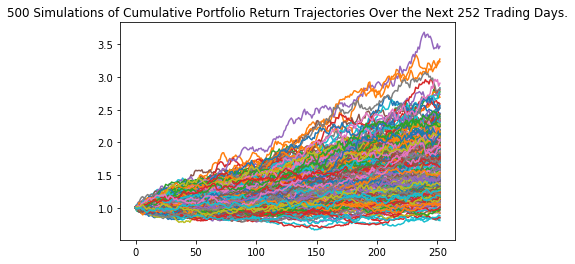

In [177]:
line_plot = MC_1_year.plot_simulation()